In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import sklearn as skl
import seaborn as sns


#Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the relevant Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI Summative_Cleaned_Dataset - Cleaned-Dataset.csv", index_col=0)
df.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Series Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Access to electricity (% of population),Algeria,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,98.74726868,98.87762451,99.04978943,98.76466047,99.53858185,99.84082031,99.93136597,99.99005127,100,100,..
"Children in employment, total (% of children ages 7-14)",Algeria,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,7.500763698,..,..,..,..,..,..
"Children out of school, primary",Algeria,614621,549637,510013,539814,548351,541872,565833,592222,..,462619,426108,329083,272111,245671,207294,186567,169018,153328,98566,29031,30997,26336,24848,..,..,23175,26224,19722,14211,16430
"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)",Algeria,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,24.15286064,..,47.30498886,..,..,..,..,..,..,..,..,..,..,..
"Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)",Algeria,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,8.031359673,..,..,..,..,..,..,..,..,..,..,..


# Dataset Exploratory Analysis 
- Getting Sense of the Dataset
- Underatanding Columns and Rows in the Dataset
- Cleaning and Preparations of Dataset 

** **

## Data Cleaning and Preparations

In [ ]:
Cleaned_Data= df.T
Cleaned_Data.head()

Series Name,Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),"Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)","Lower secondary completion rate, total (% of relevant age group)","Over-age students, primary (% of enrollment)","Share of youth not in education, employment or training, total (% of youth population)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),...,"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25

In [ ]:
#remove the Nan Columns Values
Cleaned_Data.dropna(how='all', axis=1, inplace=True)
Cleaned_Data = Cleaned_Data.drop(['Country Name'], 0)
Cleaned_Data.head()


Series Name,Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),"Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)","Lower secondary completion rate, total (% of relevant age group)","Over-age students, primary (% of enrollment)","Share of youth not in education, employment or training, total (% of youth population)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),...,"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25

In [ ]:
# Understanding the current shape of our dataset.
# Over 30 rows and 6830 Columns of data
Cleaned_Data.shape

(30, 1893)

In [ ]:
# Checking the features in our dataset
Cleaned_Data.columns

Index(['Access to electricity (% of population)',
       'Children in employment, total (% of children ages 7-14)',
       'Children out of school, primary',
       'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)',
       'Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)',
       'Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)',
       'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)',
       'Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Employment in industry (% of total employment) (modeled ILO estimate)',
       'Employment in services (% of total employment) (modeled ILO estimate)',
       ...
       'Unemployment, male (% of male labor force) (modeled ILO estimate)',
       'Unemployment, male (% of male labor force) (national estimate)',

In [ ]:
Cleaned_Data.info

<bound method DataFrame.info of Series Name Access to electricity (% of population)  ... Unemployment, youth total (% of total labor force ages 15-24) (national estimate)
1990                                             ..  ...                                                 ..                               
1991                                             ..  ...                                                 ..                               
1992                                             ..  ...                                                 ..                               
1993                                             ..  ...                                                 ..                               
1994                                             ..  ...                                                 ..                               
1995                                             ..  ...                                                 ..                           

In [ ]:
# Printing basic information about the dataset
# Includes the count non-null values for each feature & their respective datatypes
Cleaned_Data.dtypes

Series Name
Access to electricity (% of population)                                                               object
Children in employment, total (% of children ages 7-14)                                               object
Children out of school, primary                                                                       object
Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)    object
Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)     object
                                                                                                       ...  
Unemployment, youth female (% of female labor force ages 15-24) (national estimate)                   object
Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)                    object
Unemployment, youth male (% of male labor force ages 15-24) (national estimate)                       object
Unemplo

In [ ]:
Cleaned_Data.head()

Series Name,Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),"Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)","Lower secondary completion rate, total (% of relevant age group)","Over-age students, primary (% of enrollment)","Share of youth not in education, employment or training, total (% of youth population)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),...,"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25

In [ ]:
# Remove empty columns by replacing them with the means value
Cleaned_Data = Cleaned_Data.replace("..", np.NaN)
Cleaned_Data = Cleaned_Data.fillna(Cleaned_Data.mean())
Cleaned_Data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Series Name,Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),"Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)","Lower secondary completion rate, total (% of relevant age group)","Over-age students, primary (% of enrollment)","Share of youth not in education, employment or training, total (% of youth population)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),...,"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25

In [ ]:
Cleaned_Data['Access to electricity (% of population)'] = Cleaned_Data['Access to electricity (% of population)'].astype(float)
Cleaned_Data['Children in employment, total (% of children ages 7-14)'] = Cleaned_Data['Children in employment, total (% of children ages 7-14)'].astype(float)
#Cleaned_Data['Children out of school, primary '] = Cleaned_Data['Children out of school, primary '].astype(float)
Cleaned_Data['Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)'] = Cleaned_Data['Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)'].astype(float)
Cleaned_Data['Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)'] = Cleaned_Data['Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)'].astype(float)
Cleaned_Data['Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)'] = Cleaned_Data['Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)'].astype(float)
Cleaned_Data['Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)'] = Cleaned_Data['Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)'].astype(float)
Cleaned_Data['Employment in agriculture (% of total employment) (modeled ILO estimate)'] = Cleaned_Data['Employment in agriculture (% of total employment) (modeled ILO estimate)'].astype(float)
Cleaned_Data['Employment in industry (% of total employment) (modeled ILO estimate)'] = Cleaned_Data['Employment in industry (% of total employment) (modeled ILO estimate)'].astype(float)
Cleaned_Data['Employment in services (% of total employment) (modeled ILO estimate)'] = Cleaned_Data['Employment in services (% of total employment) (modeled ILO estimate)'].astype(float)
Cleaned_Data['GDP growth (annual %)'] = Cleaned_Data['GDP growth (annual %)'].astype(float)
Cleaned_Data['Literacy rate, adult total (% of people ages 15 and above)'] = Cleaned_Data['Literacy rate, adult total (% of people ages 15 and above)'].astype(float)
Cleaned_Data['Literacy rate, youth total (% of people ages 15-24)'] = Cleaned_Data['Literacy rate, youth total (% of people ages 15-24)'].astype(float)
Cleaned_Data['Lower secondary completion rate, total (% of relevant age group)'] = Cleaned_Data['Lower secondary completion rate, total (% of relevant age group)'].astype(float)
Cleaned_Data['Over-age students, primary (% of enrollment)'] = Cleaned_Data['Over-age students, primary (% of enrollment)'].astype(float)
Cleaned_Data['Share of youth not in education, employment or training, total (% of youth population)'] = Cleaned_Data['Share of youth not in education, employment or training, total (% of youth population)'].astype(float)
Cleaned_Data['Unemployment, female (% of female labor force) (modeled ILO estimate)'] = Cleaned_Data['Unemployment, female (% of female labor force) (modeled ILO estimate)'].astype(float)
Cleaned_Data['Unemployment, female (% of female labor force) (national estimate)'] = Cleaned_Data['Unemployment, female (% of female labor force) (national estimate)'].astype(float)
Cleaned_Data['Unemployment, male (% of male labor force) (modeled ILO estimate)'] = Cleaned_Data['Unemployment, male (% of male labor force) (modeled ILO estimate)'].astype(float)
Cleaned_Data['Unemployment, male (% of male labor force) (national estimate)'] = Cleaned_Data['Unemployment, male (% of male labor force) (national estimate)'].astype(float)
Cleaned_Data['Unemployment, total (% of total labor force) (modeled ILO estimate)'] = Cleaned_Data['Unemployment, total (% of total labor force) (modeled ILO estimate)'].astype(float)
Cleaned_Data['Unemployment, total (% of total labor force) (national estimate)'] = Cleaned_Data['Unemployment, total (% of total labor force) (national estimate)'].astype(float)
Cleaned_Data['Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)'] = Cleaned_Data['Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)'].astype(float)
Cleaned_Data['Unemployment, youth female (% of female labor force ages 15-24) (national estimate)'] = Cleaned_Data['Unemployment, youth female (% of female labor force ages 15-24) (national estimate)'].astype(float)
Cleaned_Data['Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)'] = Cleaned_Data['Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)'].astype(float)
Cleaned_Data['Unemployment, youth male (% of male labor force ages 15-24) (national estimate)'] = Cleaned_Data['Unemployment, youth male (% of male labor force ages 15-24) (national estimate)'].astype(float)
Cleaned_Data['Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)'] = Cleaned_Data['Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)'].astype(float)
Cleaned_Data['Unemployment, youth total (% of total labor force ages 15-24) (national estimate)'] = Cleaned_Data['Unemployment, youth total (% of total labor force ages 15-24) (national estimate)'].astype(float)







In [ ]:
Cleaned_Data.dtypes

Series Name
Access to electricity (% of population)                                                               float64
Children in employment, total (% of children ages 7-14)                                               float64
Children out of school, primary                                                                        object
Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)    float64
Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)     float64
                                                                                                       ...   
Unemployment, youth female (% of female labor force ages 15-24) (national estimate)                   float64
Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)                    float64
Unemployment, youth male (% of male labor force ages 15-24) (national estimate)                       float6

In [ ]:
#  Checking for null values

Cleaned_Data.isna().sum()

Series Name
Access to electricity (% of population)                                                               20
Children in employment, total (% of children ages 7-14)                                               29
Children out of school, primary                                                                        3
Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)    28
Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)     29
                                                                                                      ..
Unemployment, youth female (% of female labor force ages 15-24) (national estimate)                   24
Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)                     1
Unemployment, youth male (% of male labor force ages 15-24) (national estimate)                       24
Unemployment, youth total (% of total labor

In [ ]:
# Group all the columns to remove duplicates.
# .sum used to group columns
Cleaned_Data.groupby(by=Cleaned_Data.columns, axis=1).sum()

Series Name,Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),Informal employment (% of total non-agricultural employment),"Informal employment, female (% of total non-agricultural employment)","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)","Lower secondary completion rate, total (% of relevant age group)","Over-age students, primary (% of enrollment)","Share of youth not in education, employment or training, total (% of youth population)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)"
1990,310.659492,0.000000,0.0,0.0,0.0,0.0,57.859591,2.783010,0.000000,41.722849,0.000000,0.000000,0.000000,152.331593,0.0,0.0,354.835552,442.018597,611.645301,400.69420,0.000000,0.000000,98.589998,0.000000,78.629999,0.000000,85.670001,0.000000,73.839999,0.000000,72.719998,0.000000,73.019999
1991,354.623884,0.000000,0.0,0.0,0.0,0.0,60.294229,4.635270,0.000000,1.854580,3161.385991,846.100152,1792.566126,168.212594,0.0,0.0,438.816121,557.802284,722.993000,369.08680,0.000000,562.184634,144.617588,485.086135,105.408031,511.109342,127.231702,960.966178,34.539999,903.592644,22.820000,925.714208,27.500001
1992,585.684018,0.000000,0.0,0.0,0.0,0.0,84.594920,21.218920,15.039130,0.000000,3155.364488,841.919772,1802.789132,55.323268,0.0,0.0,294.495937,368.821854,705.852657,362.40087,0.000000,566.376328,53.510000,496.058465,33.610000,520.703843,85.309999,970.183543,0.750000,924.715016,2.450000,943.572709,1.690000
1993,684.924112,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3144.921755,836.577687,1818.590294,60.151994,0.0,0.0,197.501134,256.578749,625.479653,271.14850,0.000000,583.177761,80.810000,507.157305,60.620000,532.739358,107.420000,1001.364589,40.200001,947.053736,41.669998,967.978288,40.959999
1994,773.235530,48.300000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3136.198587,831.613204,1832.246946,75.599196,0.0,0.0,261.196402,337.234364,817.798162,481.66647,0.000000,590.866237,73.159999,509.330242,54.660001,536.294308,102.710001,1015.211560,0.000000,953.879646,0.000000,976.694135,0.000000
1995,832.397593,0.0000

In [ ]:
# Cleaned_Data.drop(["Children out of school, primary",
#                    "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",
#                    ""
#                    ], 1)

In [ ]:
# Remove empty columns by replacing them with the means value
Cleaned_Data = Cleaned_Data.replace("..", np.NaN)
Cleaned_Data = Cleaned_Data.fillna(0)
Cleaned_Data.head()

Series Name,Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),"Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)","Lower secondary completion rate, total (% of relevant age group)","Over-age students, primary (% of enrollment)","Share of youth not in education, employment or training, total (% of youth population)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),...,"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Children out of school, primary","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25

In [ ]:
# Viewing basic statistical information from our dataset
Cleaned_Data.describe()

Series Name,Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),"Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)","Lower secondary completion rate, total (% of relevant age group)","Over-age students, primary (% of enrollment)","Share of youth not in education, employment or training, total (% of youth population)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",Access to electricity (% of population),"Children in employment, total (% of children ages 7-14)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),"Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)","Lower secondary completion rate, total (% of relevant age group)",...,"Share of youth not in education, employment or training, total (% of youth population)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",Access to electricity (% of population),"Children in employment, 

In [ ]:
Cleaned_Data.columns

Index(['Access to electricity (% of population)',
       'Children in employment, total (% of children ages 7-14)',
       'Children out of school, primary',
       'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)',
       'Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)',
       'Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)',
       'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)',
       'Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Employment in industry (% of total employment) (modeled ILO estimate)',
       'Employment in services (% of total employment) (modeled ILO estimate)',
       ...
       'Unemployment, male (% of male labor force) (modeled ILO estimate)',
       'Unemployment, male (% of male labor force) (national estimate)',

In [ ]:
First_Ten_Column = Cleaned_Data.iloc[:, 3:28]
First_Ten_Column.head()

Series Name,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),"Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)","Lower secondary completion rate, total (% of relevant age group)","Over-age students, primary (% of enrollment)","Share of youth not in education, employment or training, total (% of youth population)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)"
1990,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.800001,0.0,0.0,58.152920,6.11323,0.0,0.000000,20.709999,0.000000,21.299999,0.000000,21.260000,0.000000,0.0,0.000000,0.0,0.000000,0.0
1991,0.0,0.0,0.0,0.0,24.879999,25.400000,49.730000,-1.200001,0.0,0.0,55.196911,5.93736,0.0,16.600000,17.000000,21.190001,21.700001,20.600000,20.600000,24.750000,0.0,36.740002,0.0,34.400002,0.0
1992,0.0,0.0,0.0,0.0,24.730000,25.260000,50.009998,1.800002,0.0,0.0,57.202381,6.24687,0.0,20.639999,0.000000,24.940001,0.000000,24.379999,24.379999,30.559999,0.0,42.650002,0.0,40.299999,0.0
1993,0.0,0.0,0.0,0.0,24.559999,25.030001,50.419998,-2.100001,0.0,0.0,56.720951,6.71555,0.0,22.670000,0.000000,26.760000,0.000000,26.230000,26.230000,33.619999,0.0,45.389999,0.0,43.139999,0.0
1994,0.0,0.0,0.0,0.0,24.360001,24.820000,50.810001,-0.899997,0.0,0.0,57.028690,7.13496,0.0,25.170000,0.000000,28.120001,0.000000,27.740000,27.740000,37.220001,0.0,47.360001,0.0,45.450001,0.0


# Model Development and Predictions

- Correlation between Datapoints
- Correlation coefficients quantify the association between variables or features of a dataset.

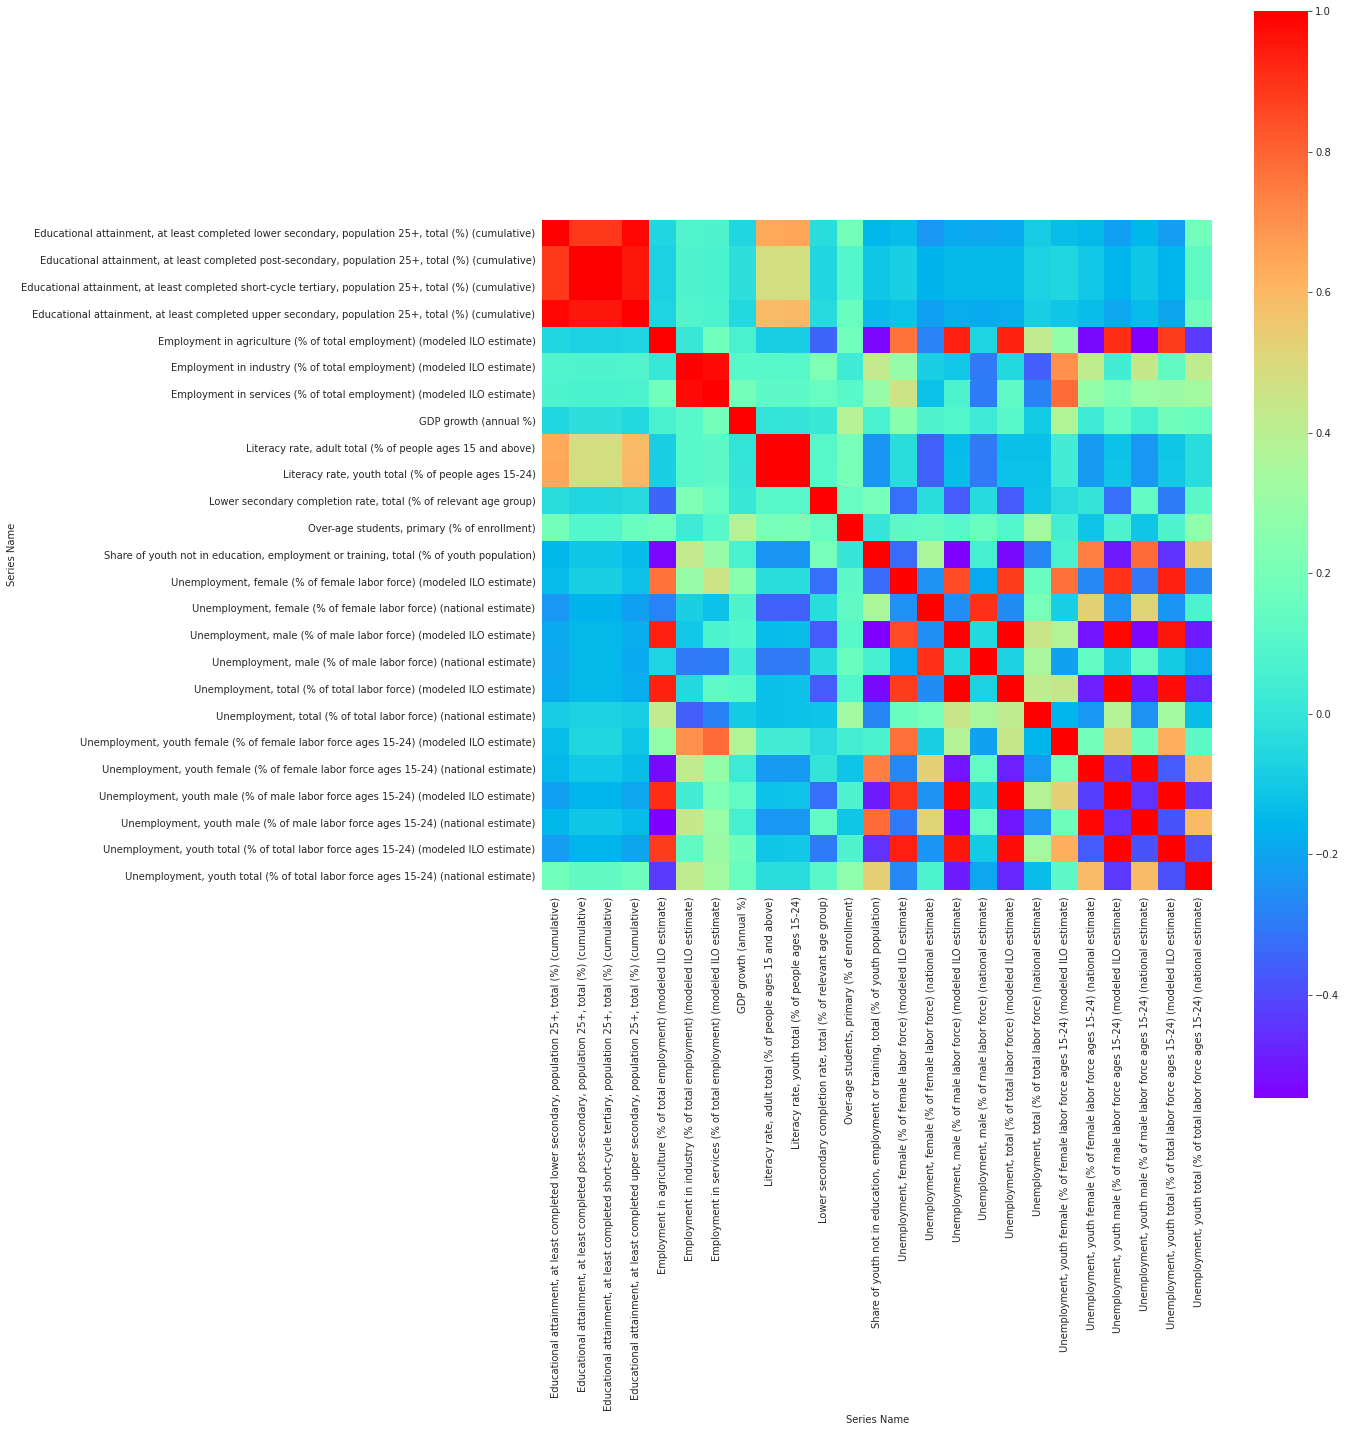

In [ ]:
#Investigating the correlations between the paramenter and Dataset 
corr = First_Ten_Column.corr()
plt.figure(figsize=(15, 20))
sns.heatmap(corr, square=True, annot=False, cmap='rainbow')

- Choosing a Prediction Datapoint and use it to train the model
- Using numpy array to assign x and y values for predictions

In [ ]:
# Define a correct attributes and datapoint in the places we are trying to predict
# Generate a x and y numpy arrays to introduce the Datapoints and features and x and y labels
predict = 'Employment in agriculture (% of total employment) (modeled ILO estimate)'
# features
x = np.array(First_Ten_Column.drop([predict],1))
# labels
y = np.array(First_Ten_Column[predict])

- **Do a second correllation to show how labels correlate with each other** 

Text(0, 0.5, 'FACTORS IN CORRELATION')

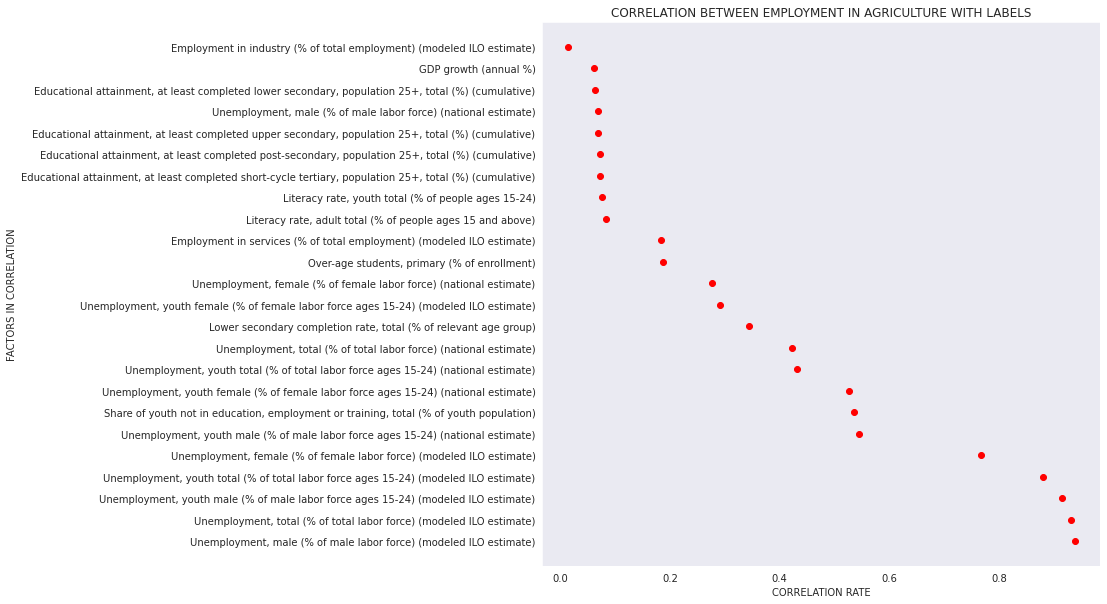

In [ ]:
#Drawing a labels correlation between Datapoints and plot it's Correlation 
labelCorr = abs(corr['Employment in agriculture (% of total employment) (modeled ILO estimate)']).sort_values(ascending=False).drop(['Employment in agriculture (% of total employment) (modeled ILO estimate)'], axis=0)
sns.set_style("dark")
plt.figure(figsize=(10, 10))
plt.title("CORRELATION BETWEEN EMPLOYMENT IN AGRICULTURE WITH LABELS")
plt.scatter(labelCorr, labelCorr.index , color = 'red')
plt.xlabel("CORRELATION RATE")
plt.ylabel("FACTORS IN CORRELATION")

Text(0, 0.5, 'FACTORS IN CORRELATION')

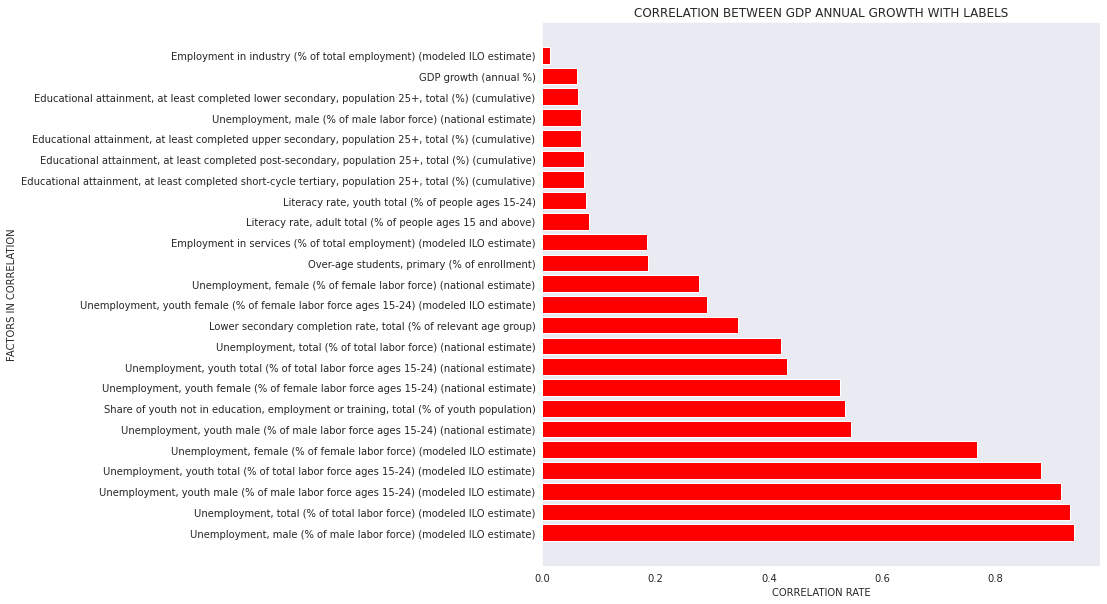

In [ ]:
#Drawing a labels correlation between Datapoints and plot it's Correlation 
labelCorr = abs(corr['Employment in agriculture (% of total employment) (modeled ILO estimate)']).sort_values(ascending=False).drop(['Employment in agriculture (% of total employment) (modeled ILO estimate)'], axis=0)
sns.set_style("dark")
plt.figure(figsize=(10, 10))
plt.title("CORRELATION BETWEEN GDP ANNUAL GROWTH WITH LABELS")

plt.barh(labelCorr.index, labelCorr, color = 'red')
plt.xlabel("CORRELATION RATE")
plt.ylabel("FACTORS IN CORRELATION")

- 

In [167]:
# splitting our data into train and test data
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.svm import SVR


from xgboost import XGBRegressor


In [168]:
# splitting our data into train and test data
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.1)

In [169]:
# defining the model that we are going to use
model = linear_model.LinearRegression()

In [170]:
First_Ten_Column.head()

Series Name,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),"Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)","Lower secondary completion rate, total (% of relevant age group)","Over-age students, primary (% of enrollment)","Share of youth not in education, employment or training, total (% of youth population)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)"
1990,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.800001,0.0,0.0,58.152920,6.11323,0.0,0.000000,20.709999,0.000000,21.299999,0.000000,21.260000,0.000000,0.0,0.000000,0.0,0.000000,0.0
1991,0.0,0.0,0.0,0.0,24.879999,25.400000,49.730000,-1.200001,0.0,0.0,55.196911,5.93736,0.0,16.600000,17.000000,21.190001,21.700001,20.600000,20.600000,24.750000,0.0,36.740002,0.0,34.400002,0.0
1992,0.0,0.0,0.0,0.0,24.730000,25.260000,50.009998,1.800002,0.0,0.0,57.202381,6.24687,0.0,20.639999,0.000000,24.940001,0.000000,24.379999,24.379999,30.559999,0.0,42.650002,0.0,40.299999,0.0
1993,0.0,0.0,0.0,0.0,24.559999,25.030001,50.419998,-2.100001,0.0,0.0,56.720951,6.71555,0.0,22.670000,0.000000,26.760000,0.000000,26.230000,26.230000,33.619999,0.0,45.389999,0.0,43.139999,0.0
1994,0.0,0.0,0.0,0.0,24.360001,24.820000,50.810001,-0.899997,0.0,0.0,57.028690,7.13496,0.0,25.170000,0.000000,28.120001,0.000000,27.740000,27.740000,37.220001,0.0,47.360001,0.0,45.450001,0.0


In [171]:
# First_Ten_Column['Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)']=First_Ten_Column['Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)'].replace(0,df['Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)'].mean())


In [ ]:
First_Ten_Column = First_Ten_Column.dropna()

In [172]:
First_Ten_Column.head()

Series Name,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP growth (annual %),"Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)","Lower secondary completion rate, total (% of relevant age group)","Over-age students, primary (% of enrollment)","Share of youth not in education, employment or training, total (% of youth population)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)"
1990,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.800001,0.0,0.0,58.152920,6.11323,0.0,0.000000,20.709999,0.000000,21.299999,0.000000,21.260000,0.000000,0.0,0.000000,0.0,0.000000,0.0
1991,0.0,0.0,0.0,0.0,24.879999,25.400000,49.730000,-1.200001,0.0,0.0,55.196911,5.93736,0.0,16.600000,17.000000,21.190001,21.700001,20.600000,20.600000,24.750000,0.0,36.740002,0.0,34.400002,0.0
1992,0.0,0.0,0.0,0.0,24.730000,25.260000,50.009998,1.800002,0.0,0.0,57.202381,6.24687,0.0,20.639999,0.000000,24.940001,0.000000,24.379999,24.379999,30.559999,0.0,42.650002,0.0,40.299999,0.0
1993,0.0,0.0,0.0,0.0,24.559999,25.030001,50.419998,-2.100001,0.0,0.0,56.720951,6.71555,0.0,22.670000,0.000000,26.760000,0.000000,26.230000,26.230000,33.619999,0.0,45.389999,0.0,43.139999,0.0
1994,0.0,0.0,0.0,0.0,24.360001,24.820000,50.810001,-0.899997,0.0,0.0,57.028690,7.13496,0.0,25.170000,0.000000,28.120001,0.000000,27.740000,27.740000,37.220001,0.0,47.360001,0.0,45.450001,0.0


In [173]:
# First_Ten_Column.drop([ "Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)",
#                        "Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)",
#                        "Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)",
#                        "Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",
#                        "Literacy rate, adult total (% of people ages 15 and above)",
#                        "Literacy rate, youth total (% of people ages 15-24)"
#                        ], 1)

In [174]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,6,7,8,11,13,15,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.800001,0.0,0.0,0.0,20.709999,21.299999,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,-1.200001,0.0,0.0,0.0,17.000000,21.700001,24.750000,0.0,36.740002,0.0,34.400002,0.0
2,0.0,0.0,0.0,0.0,1.800002,0.0,0.0,0.0,0.000000,0.000000,30.559999,0.0,42.650002,0.0,40.299999,0.0
3,0.0,0.0,0.0,0.0,-2.100001,0.0,0.0,0.0,0.000000,0.000000,33.619999,0.0,45.389999,0.0,43.139999,0.0
4,0.0,0.0,0.0,0.0,-0.899997,0.0,0.0,0.0,0.000000,0.000000,37.220001,0.0,47.360001,0.0,45.450001,0.0


In [175]:
x = x.drop([13,18],axis = 1)

In [176]:
y = pd.DataFrame(y,columns=['Actual_value'])
y.head()

,Actual_value
0,0.000000
1,24.879999
2,24.730000
3,24.559999
4,24.360001


In [177]:
# using xgboost regression
model = XGBRegressor()
model.fit(x_train,y_train)

[13:19:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [178]:
# train our model and check for accuracy
model.fit(x_train, y_train)
accuracy = model.score(x_test,y_test)
print('Model Accuracy: ' , accuracy*100, '%')

[13:19:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Accuracy:  -23.637742023013388 %


In [ ]:
predicted = pd.DataFrame(model.predict(x_test), columns= ['Final Predicted Value'])
predicted.head()

,Final Predicted Value
0,11.517837
1,10.210416
2,18.661327


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import xgboost as xgb

In [162]:
# Splitting the label from other features
data = First_Ten_Column.drop(['Employment in agriculture (% of total employment) (modeled ILO estimate)'], axis=1)
target = First_Ten_Column['Employment in agriculture (% of total employment) (modeled ILO estimate)']
data.shape, target.shape

((30, 24), (30,))

In [163]:
# Splitting the training from the testing set
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24, 24), (24,), (6, 24), (6,))

In [164]:
# Training the data into the model 
model = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), xgb.XGBRegressor()]
model_names = ['Linear Regression', 'Decision tree regressor', 'Random forest regressor', 'xgb regressor']

for i in range(len(model)):
  y_pred = model[i].fit(X_train, y_train).predict(X_test)
  print("The r-squared score of ", model_names[i]," is: " , r2_score(y_pred, y_test)*100, "%")
  print("The mean squared error of ", model_names[i]," is: " , mean_squared_error(y_pred, y_test),"\n")

The r-squared score of  Linear Regression  is:  88.55201397513028 %
The mean squared error of  Linear Regression  is:  2.9105461999655646 

The r-squared score of  Decision tree regressor  is:  96.10547503438349 %
The mean squared error of  Decision tree regressor  is:  1.0521000301005121 

The r-squared score of  Random forest regressor  is:  99.0587893868565 %
The mean squared error of  Random forest regressor  is:  0.25752380091819255 

[13:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The r-squared score of  xgb regressor  is:  96.4961671642628 %
The mean squared error of  xgb regressor  is:  0.9289023035314218 



In [165]:
# Running the cross validation score to avoid over-fitting
model = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), xgb.XGBRegressor()]
model_names = ['Linear Regression', 'Decision tree regressor', 'Random forest regressor', 'xgb regressor']

for i in range(len(model)):
  accuracy = cross_val_score(model[i], X_train, y_train, cv=10)
  print("The adjusted accuracy of ", model_names[i], " is ", accuracy.mean()*100,"%")

The adjusted accuracy of  Linear Regression  is  -5493.256122806706 %
The adjusted accuracy of  Decision tree regressor  is  53.35444031510972 %
The adjusted accuracy of  Random forest regressor  is  -69.9188197050743 %
[13:14:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:20] WARNING